## Classifier

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [2]:
'''
Load CSV
'''
df = pd.read_csv('titanic_dataset(1).csv')

In [3]:
'''
Inspect dataset
'''
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X = df.drop(['Survived'],axis=1) #input features - everything except the Survived feature
y = df['Survived'].to_frame() #target feature
X


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) #random_state->seed

In [8]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))

The shape of X (891, 11). X_train has shape (623, 11) while X_test has shape (268, 11)


In [9]:
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of y (891, 1). y_train has shape (623, 1) while y_test has shape (268, 1)


In [10]:
#Criar instancia de uma decision tree classifier com seed 12345
clf = DecisionTreeClassifier(random_state=12345)

In [11]:
#dropping categorical features from the input data (X_train and X_test)
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)  
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)    

In [21]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [22]:
predictions = clf.predict(X_test)

In [23]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0], dtype=int64)

In [24]:
confusion_matrix(y_test, predictions)

array([[114,  42],
       [ 58,  54]], dtype=int64)

In [25]:
accuracy_score(y_test, predictions)

0.6268656716417911

In [26]:
precision_score(y_test, predictions)

0.5625

In [27]:
recall_score(y_test, predictions)

0.48214285714285715

In [28]:
roc_auc_score(y_test, predictions)

0.606456043956044

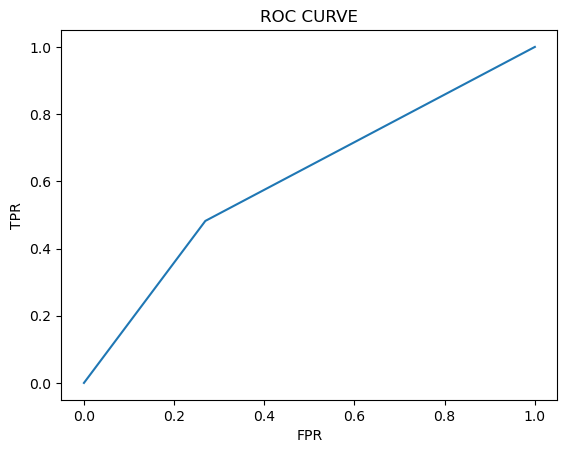

In [29]:
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [30]:
f1_score(y_test, predictions)

0.5192307692307692

In [31]:
fbeta_score(y_test, predictions,beta=0.5)

0.5443548387096774

## Regressor

In [32]:
#Let's assume a REGRESSION problem! Let's predict the FARE paid by a person 
#(maybe not a very good problem but it serves its purpose)!
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X = df.drop(['Fare'],axis=1) #input features - everything except the Fare feature
y = df['Fare'].to_frame() #target feature

In [33]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) #random_state->seed

#dropping categorical features from the input data (X_train and X_test)  
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)  
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [34]:
#Create an instance of a Decision Tree regressor
#Again, defining the random_state for reproducibility
clf = DecisionTreeRegressor(random_state=12345)


In [35]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=12345)

In [36]:
predictions = clf.predict(X_test)
predictions

array([ 10.1708,   7.05  , 164.8667,  73.5   ,  14.4542,   7.25  ,
         0.    ,  10.5   ,  51.8625,  10.5   ,  13.    ,   7.75  ,
         7.75  ,   6.75  ,  10.5   ,  26.    ,   8.05  ,   8.6625,
        30.5   ,   8.6833,  14.    ,  13.    ,   8.05  ,   6.975 ,
        30.0708,   7.2292,  13.    , 110.8833,   8.05  ,   7.75  ,
         8.6625,   7.8958,   7.55  ,   7.7333,   7.8958,  26.55  ,
        13.    ,   7.775 ,  18.    ,  15.85  ,  39.    ,   7.125 ,
       135.6333,   0.    ,   7.0458, 227.525 ,   7.65  ,   0.    ,
        14.4   , 151.55  ,  26.    ,  20.2125,   7.8792,   7.8292,
         9.825 ,   9.4833,  10.5   ,  33.5   ,  13.    ,   7.925 ,
        17.8   ,   7.8792,  30.0708,  29.125 ,   7.75  ,  15.5   ,
        79.2   ,   7.75  ,  30.5   ,  12.275 ,   8.4583,   7.75  ,
        18.    ,   7.4958, 110.8833,  52.    ,  19.5   ,   6.4958,
       164.8667,  79.2   , 151.55  ,  30.5   ,  35.5   ,   9.5   ,
         8.05  ,  12.475 ,  11.2417,   7.775 ,   7.2292,  12.3

In [37]:
mean_absolute_error(y_test, predictions)

16.654026492537312

In [38]:
#squared parameter as TRUE for MSE
mean_squared_error(y_test, predictions, squared=True)

2559.0920792060074

In [39]:
#squared parameter as FALSE for RMSE
mean_squared_error(y_test, predictions, squared=False)

50.587469586904696

## Cross_val_score

In [46]:
print("USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...")
X = X.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
clf = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=12345)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...
[0.58888889 0.61797753 0.51685393 0.50561798 0.61797753 0.70786517
 0.71910112 0.68539326 0.59550562 0.74157303]
RESULT: 0.63 accuracy with a standard deviation of 0.08


## K-fold

In [48]:
'''
Iterating manually (with K-fold, Repeated K-fold, Leave One Out, Shuffle Split, Stratified k-fold, TimeSeriesSplit, ...)
'''
print("USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...")
from sklearn.model_selection import KFold
scores = []
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    clf.fit(X.loc[train,:],y.loc[train,:])
    score = clf.score(X.loc[test,:],y.loc[test,:])
    scores.append(score)
    y_predicted = clf.predict(X.loc[test,:])
    print("Confusion Matrix:")
    print(confusion_matrix(y.loc[test,:], y_predicted))
    print(score)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (np.mean(scores),np.std(scores)))

USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...
Confusion Matrix:
[[38 13]
 [24 15]]
0.5888888888888889
Confusion Matrix:
[[33 36]
 [ 8 12]]
0.5056179775280899
Confusion Matrix:
[[37 18]
 [20 14]]
0.5730337078651685
Confusion Matrix:
[[36  8]
 [20 25]]
0.6853932584269663
Confusion Matrix:
[[34 18]
 [17 20]]
0.6067415730337079
Confusion Matrix:
[[41 16]
 [ 9 23]]
0.7191011235955056
Confusion Matrix:
[[32 18]
 [13 26]]
0.651685393258427
Confusion Matrix:
[[43 13]
 [15 18]]
0.6853932584269663
Confusion Matrix:
[[44 15]
 [10 20]]
0.7191011235955056
Confusion Matrix:
[[42 14]
 [15 18]]
0.6741573033707865
RESULT: 0.64 accuracy with a standard deviation of 0.07
